# Problem 1

## Download all images here

In [1]:
# download images for testing
!wget https://drive.google.com/uc?id=1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg -O final.zip
!unzip final.zip -d .

--2022-11-29 16:09:03--  https://drive.google.com/uc?id=1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg
Resolving drive.google.com (drive.google.com)... 108.177.98.101, 108.177.98.138, 108.177.98.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9fvhpvv6uinokk3aad0kl6o3b47sdl0v/1669738125000/10800959494545164832/*/1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg?uuid=0b309b43-45e0-41be-8bd1-fc0aa6d3b9d9 [following]
--2022-11-29 16:09:04--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9fvhpvv6uinokk3aad0kl6o3b47sdl0v/1669738125000/10800959494545164832/*/1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg?uuid=0b309b43-45e0-41be-8bd1-fc0aa6d3b9d9
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0s

## Write your code in the area provided

In [129]:
# Final_1
# Make sure that you can run main() successfully without error before submission
# Do not change function name, return variables or input parameters (will be used for marking) 
# Do not remove provided code / comments in this cell
# Only write code in the area provided, see comments -> ####### write your code here #################
import numpy as np
import matplotlib.pyplot as plt
import cv2

####### import you library here only #################

from numpy import linalg

# colors represents estimated contents - A, B and C, particles and beaker
colors = { 0: (255,255,0),   # "content_A"
           1: (0,255,255),   # "content_B"
           2: (255,0,255),   # "content_C"
           3: (81, 144, 0),  # "particles"
           4: (0, 0, 0)}     # "beaker"

def cal_content_proportion(image):
  # input - image: numpy array of an RGB image
  # output -  pA: (int) proportion of liquid content A (in percent)
  #           pB: (int) proportion of liquid content B (in percent)
  #           pC: (int) proportion of liquid content C (in percent)
  pA,pB,pC = 0,0,0

  ####### write your code here #################

  img = np.copy(image)
  img = crop(img)
  img = img[:,0]

  yellow = np.array([255,255,0])
  cyan = np.array([0,255,255])
  margenta = np.array([255,0,255])

  bin = []
  for i in range(img.shape[0]):
    if(linalg.norm(yellow - img[i]) <= 2):
      bin.append(1) # yellow
    elif(linalg.norm(cyan - img[i]) <= 2):
      bin.append(2) # cyan
    elif(linalg.norm(margenta - img[i]) <= 2):
      bin.append(3) # margenta
    else:
      bin.append(0)
  
  sep = []
  for i in range(len(bin)-1):
    if(bin[i] == 1 and bin [i+1] == 0):
      sep.append(('y', i+1))
    elif(bin[i] == 0 and bin [i+1] == 2):
      sep.append(('c', i))
    elif(bin[i] == 2 and bin [i+1] == 0):
      sep.append(('c', i+1))
    elif(bin[i] == 0 and bin [i+1] == 3):
      sep.append(('m', i))
    else:
      pass

  i = 0
  c = []
  prop = []
  while i < len(sep):
    c.append(sep[i][0])
    c.append(sep[i+1][0])
    prop.append(round((sep[i][1] + sep[i+1][1])/2 * 100 / img.shape[0]))
    i += 2
  
  if (c == ['c', 'm']):
    p = prop[0]
    pA,pB,pC = 0,p,100-p
  elif (c == ['y', 'c']):
    p = prop[0]
    pA,pB,pC = p,100-p,0
  elif (c == ['y', 'm']):
    p = prop[0]
    pA,pB,pC = p,0,100-p
  elif (c == ['y', 'c', 'c', 'm']):
    p1 = prop[0]
    p2 = prop[1]
    pA,pB,pC = p1,p2-p1,100-p2
  else:
    pA,pB,pC = 0,0,0

  return pA,pB,pC # return pA,pB,pC


def count_particles(image):
  # input - image: numpy array of an RGB image
  # output -  n_count: (int) total number of particles in the beaker 
  n_count = 0
  ####### write your code here #################
  
  img = np.copy(image)
  nA,nB,nC = count_particles_in_a_content(img)

  return nA+nB+nC


def count_particles_in_a_content(image):
  # input - image: numpy array of an RGB image
  # output -  n_count: total number of particles in the beaker 
  # output -  nA: (int) total number of particles in liquid content A 
  #           nB: (int) total number of particles in liquid content B 
  #           nC: (int) total number of particles in liquid content C 
  nA,nB,nC = 0,0,0
  ####### write your code here #################

  img = np.copy(image)
  pA,pB,pC = cal_content_proportion(img)
  img = crop(img)
  green = np.array([81, 144, 0])
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if(linalg.norm(green - img[i][j]) <= 2):
        img[i][j] = np.array([255, 255, 255])
      else:
        img[i][j] = np.array([0, 0, 0])

  kernel = np.ones((5,5),np.uint8)
  img = cv2.erode(img,kernel,iterations = 2)
  kernel = np.ones((3,3),np.uint8)
  img = cv2.erode(img,kernel,iterations = 1)

  connectivity = 4
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  output = cv2.connectedComponentsWithStats(img, connectivity, cv2.CV_16U)
  stats = output[2]

  res = []
  for i in range(len(stats)):
    if stats[i][0] != 0 and stats[i][4] > 25:
      res.append(stats[i][1] + stats[i][3]/2)
  a = pA * 5
  b = (pA + pB) * 5
  c = (pA + pB + pC) * 5
  for e in res:
    if(e <= a): 
      nA += 1
    elif(e <= b): 
      nB += 1
    elif(e <= c): 
      nC += 1
    else:
      pass

  return nA,nB,nC


####### write your own function here, if needed #################

def crop(image):
  img = np.copy(image)
  return img[:500, 25:275]


###############################################################################
def main():
  # main() is provided for testing your code
  # Make sure that you can run main() successfully without error before submission
  # Do not change function name, return variables or input parameters (will be used for marking) 
  
  # read an image and convert it to RGB
  image = cv2.imread("01_01.png")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.show()

  # calculate content proportion of liquid content A, B and C, respectively
  pA,pB,pC = cal_content_proportion(image)
  print('Proportion: {}%, {}%, {}% '.format(pA,pB,pC))

  # count number of particles in content A, B and C, respectively
  nA,nB,nC = count_particles_in_a_content(image)
  print('Number of Particles in each content: {}, {}, {} '.format(nA,nB,nC))

  # count total number of particles
  n_count = count_particles(image)
  print('Total number of particles:',n_count)


## Test your code here

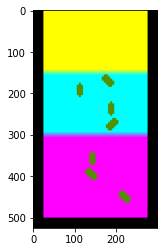

Proportion: 30%, 30%, 40% 
Number of Particles in each content: 0, 4, 3 
Total number of particles: 7


In [130]:
# Test your code here
main()

# Problem 2

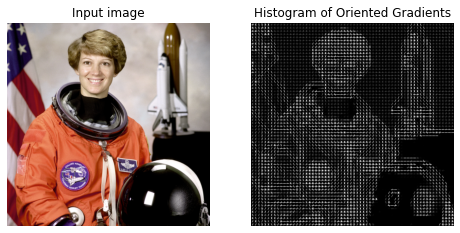

In [106]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

image = data.astronaut()

fd, hog_image = hog(image, orientations=3, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [107]:
fd.shape

(47628,)